[Reference](https://medium.com/geekculture/creating-a-waterfall-chart-in-python-dc7bcddecb45)

In [4]:
!pip install waterfallcharts

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-cp37-none-any.whl size=3414 sha256=329446e498dd309f72a4be4bdd97dcf3fc39507540e0c2df383825396e67d3fa
  Stored in directory: /root/.cache/pip/wheels/f9/be/d0/59ccb7fc5d874cbea7cbfcf89e42feccfe8fa18a90a1bf4370
Successfully built waterfallcharts


In [1]:
import pandas as pd
brent = pd.DataFrame({'price':[63.8, 55.7, 32.5, 18.4, 29.4, 40.3,
                               43.2, 44.7, 40.9, 40.2, 42.7, 50]}, 
                      index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                             'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                             'Nov', 'Dec'])
print(brent.head(3))

     price
Jan   63.8
Feb   55.7
Mar   32.5


In [2]:
deltas = [brent['price'][i] if i==0 else brent['price'][i]-brent['price'][i-1] for i in range(len(brent))]
brent['delta'] = deltas
print(brent)

     price  delta
Jan   63.8   63.8
Feb   55.7   -8.1
Mar   32.5  -23.2
Apr   18.4  -14.1
May   29.4   11.0
Jun   40.3   10.9
Jul   43.2    2.9
Aug   44.7    1.5
Sep   40.9   -3.8
Oct   40.2   -0.7
Nov   42.7    2.5
Dec   50.0    7.3


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

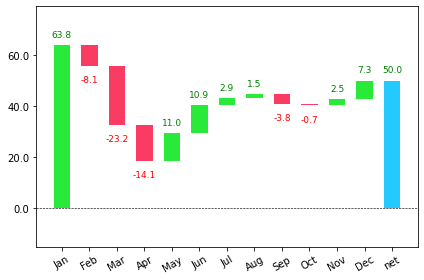

In [5]:
import waterfall_chart
waterfall_chart.plot(brent.index, brent['delta'])

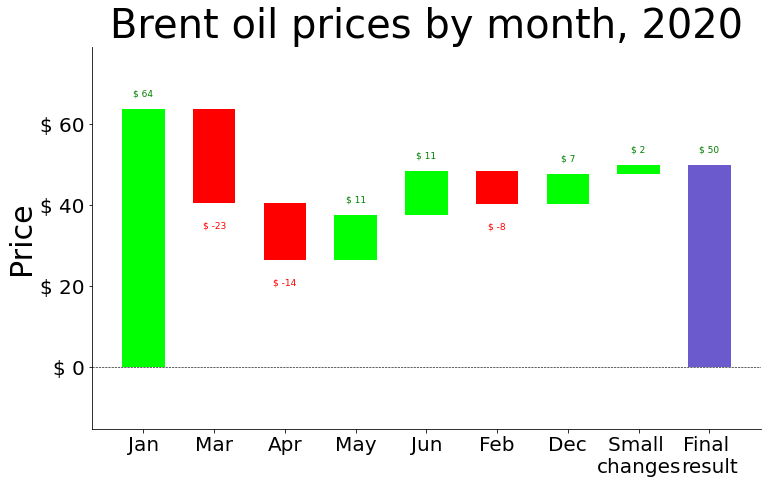

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

waterfall_chart.plot(brent.index, brent['delta'], 
                     rotation_value=0, 
                     sorted_value=True,
                     threshold=0.1, 
                     formatting="$ {:,.0f}",
                     net_label='Final \nresult',
                     other_label='Small \nchanges',
                     blue_color='slateblue', 
                     green_color='lime', red_color='red')
plt.title('Brent oil prices by month, 2020', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price', fontsize=30)
sns.despine()
plt.show()